## Ml models
learn patters and relationships to predict

Classification, regression, clustering, etc
##How they work
* Data collection
* Data preprocessing
* Model training
* Model evaluation
* Prediction or interference
w/ visual representation

##supervised vs unsupervised learning
Supervised
* labelled data w input-output pairs
* For classification/regression

Unsupervised
* For clustering, etc


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
df = pd.DataFrame(data=np.c_[X, y], columns=np.append(data.feature_names, ["target"]))
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# random_state = standardization, seed to pseudo-random numbers

##Confusion matrix
Binary classification - eg, yes dawg or no dawg

Table used to evaluate the performance of a classification model

Eg, class 1 = yes dawg (base class = positive class) and class 2 = no dawg (negative class)

4 metrics
* True Positive - correctly predicts base class
* True Negative - —-----“ —-------- negative class
* False Positive (type 1) = actually negative predicted as positive
* True Negative (type 2) = actually positive predicted as negative
    
    Given:	P	|	N
    Predicted: _________	|__________
    P	TP	|	FP
    N	FN	|	TN

This is better than right/total correctness, because it tells you when it can be wrong and you can take decisions based on the implications of a FP or FN

Eg, CM = [38 3; 6 27]

## Classification Report (Advanced metrics)
Precision (P) = TP / (TP+FP) = how many of positives were correctly predicted

Recall ( R ) = TP / (TP+FN)

F1-score (F) =  2(P*R) / (P+R)
* Higher the better
* Lower means model is performing better on positives than negative
* Like an average

Support = number of occurrences of each class in dataset to understand the accuracy of the model better

##AUC Score
Quantifies ability to distinguish between positive and negative

###Roc (receiving operating characteristic) curve is a graphical representation of a model’s performance.

Plots TP Rate against FP Rate for different thresholds

Curve 1: AOC = 1, perfect model, all correct, hella sus irl

Curve 2: AOC = 0.5, 50% chance, its just guessing

Curve 3: AOC = 0, worst model ever


In [8]:
# to evaluate model efficacy for all 10 models for comparison
def evaluate(y_true, y_pred, y_prob, model_name):
    """
    Function to evaluate and print the model performance.
    """
    # Print model name
    print(f"Model: {model_name}")

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # AUC Score - Check if probability predictions are available
    if y_prob is not None:
        print("AUC Score:", roc_auc_score(y_true, y_prob))
    print("\n")

# MODEL 1 - Logistic Regression
!= linear regression
* LoR Puts it in a bucket, instead of a number like LiR

Not only for binary classification
* only two buckets for binary classification btw

After mapping it to a best fit line, it puts you in a bucket
* Eg, is this article buzzfeed or nyt, you dont want buzzyorktimes, you want or the other


In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, solver='saga')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
evaluate(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

Model: Logistic Regression
Confusion Matrix:
[[ 62   1]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9980893592004703




# MODEL-2 K-Nearest Neighbors
you got bunch of colorful dots

you get a new datapoint, you look at 'k' nearest neighbors within  radius

classify it as what was the majority classification of the neighbors

higher computational complexity => larger carbon emission/footprint

mini-bert for LLMs

good when data too scattered and not good for fitting regression

like classifying

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:,1]

# Evaluate K-Nearest Neighbors
evaluate(y_test, y_pred_knn, None, "K-Nearest Neighbors")

Model: K-Nearest Neighbors
Confusion Matrix:
[[ 59   4]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171





# MODEL-3 Support Vector Machine
splits data with a line

data needs to be super clean and segregated, very memory efficient in that case

eg, differentiating humans and ants based on height

In [14]:
from sklearn.svm import SVC

# Train Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate Support Vector Machine
evaluate(y_test, y_pred_svm, y_prob_svm, "Support Vector Machine")

Model: Support Vector Machine
Confusion Matrix:
[[ 61   2]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9964726631393297




# MODEL-4 Decision Tree
20-question-esque

narrows down until it finds a prediction

for this data, it'll take like is tumor-size more than x?

need appropriate classified data that can differentiate between the two categories

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:,1]

# Evaluate Decision Tree
evaluate(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

Model: Decision Tree
Confusion Matrix:
[[59  4]
 [ 9 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        63
           1       0.96      0.92      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171

AUC Score: 0.9265873015873015




#Model-5 Random Forest
mulitple decision trees and combines their predictions

democracy when combining

as many decision trees as parameters

decision tree over random forest? when one parameter is critical for the prediction, save computation

you can also assign weights to decision tree in the forest


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
evaluate(y_test, y_pred_rf, y_prob_rf, "Random Forest")

Model: Random Forest
Confusion Matrix:
[[ 60   3]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9963256907701352




# MODEL-6 Gradient Boosting
little boosts towards the solution

sorta decision tree-ish

the steeper the gradient, the less boosts it gets, and hence, can be less accurate

like 3 sec for advise on the jigsaw puzzle

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate Gradient Boosting
evaluate(y_test, y_pred_gb, y_prob_gb, "Gradient Boosting")

Model: Gradient Boosting
Confusion Matrix:
[[ 59   4]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9948559670781894




# MODEL-7 Naive Bayes
Based on bayes theorem (prob of A given B)

assumes each clue is independent of each other - hence, naive (like parameters tumor size and tumor weight)

In [22]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate Naive Bayes
evaluate(y_test, y_pred_nb, y_prob_nb, "Naive Bayes")

Model: Naive Bayes
Confusion Matrix:
[[ 57   6]
 [  5 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

AUC Score: 0.9926513815402704




# MODEL-8 Neural Network (MLP)
inspo from brain

layers are called neurons

trained through activation function

backpropagation -- train, test, feedback and repeat

In [23]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
y_prob_nn = nn_model.predict_proba(X_test)[:, 1]

# Evaluate Neural Network
evaluate(y_test, y_pred_nn, y_prob_nn, "Neural Network (MLP Classifier)")

Model: Neural Network (MLP Classifier)
Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.996766607877719




# MODEL-9 AdaBoost
only focuses on what we get wrong

works from first usually-guess-based-score to a better solution in boosts

really sensitive to bad data for this reason => needs pretty clean data

dangerous on bad data because if you guessed 30% right, you'll not learn about that 30% through the boosts and you're stuck. tldr, if you were supposed to get 0, you shouldve gotten 0.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)
y_prob_ab = ab_model.predict_proba(X_test)[:, 1]

# Evaluate AdaBoost
evaluate(y_test, y_pred_ab, y_prob_ab, "AdaBoost")

Model: AdaBoost
Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9961787184009406




# MODEL-10 XGBoost
Extreme Gradient Boost

instead of asking high schoolers for boost, you ask professor

way faster and efficient

In [25]:
import xgboost as xgb

# Train XGBoost
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_model.fit(X_train, y_train)
y_pred_xg = xg_model.predict(X_test)
y_prob_xg = xg_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
evaluate(y_test, y_pred_xg, y_prob_xg, "XGBoost")

Model: XGBoost
Confusion Matrix:
[[ 61   2]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9944150499706055




# Visualizing the Comparison

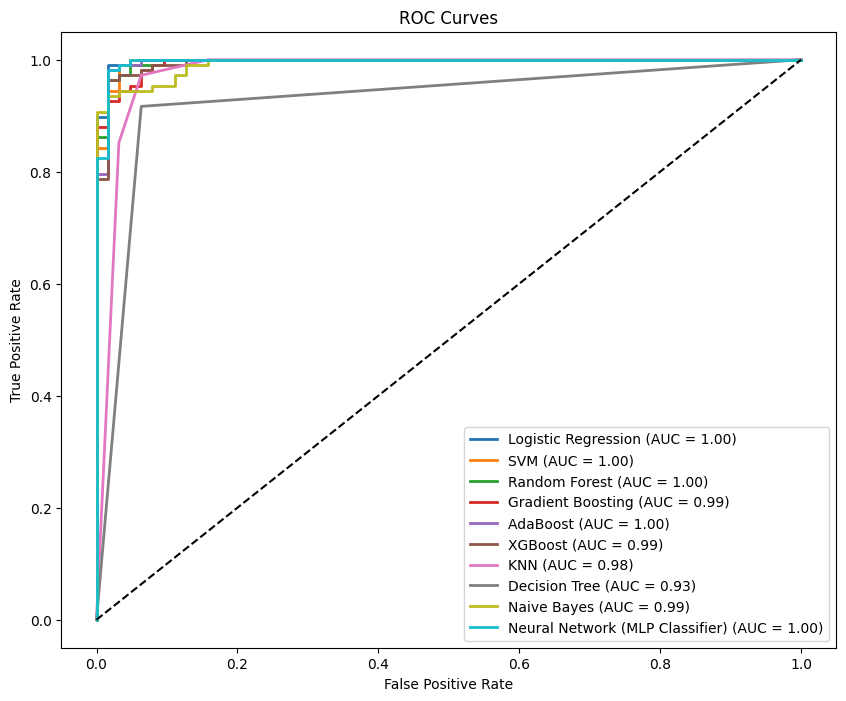

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curves for all applicable models
def plot_roc(model, X_test, y_test, label):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plot_roc(lr_model, X_test, y_test, 'Logistic Regression')
plot_roc(svm_model, X_test, y_test, 'SVM')
plot_roc(rf_model, X_test, y_test, 'Random Forest')
plot_roc(gb_model, X_test, y_test, 'Gradient Boosting')
plot_roc(ab_model, X_test, y_test, 'AdaBoost')
plot_roc(xg_model, X_test, y_test, 'XGBoost')
plot_roc(knn_model, X_test, y_test, 'KNN')
plot_roc(dt_model, X_test, y_test, 'Decision Tree')
plot_roc(nb_model, X_test, y_test, 'Naive Bayes')
plot_roc(nn_model, X_test, y_test, 'Neural Network (MLP Classifier)')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Add legends for each model
plt.legend(loc="lower right")

plt.show()

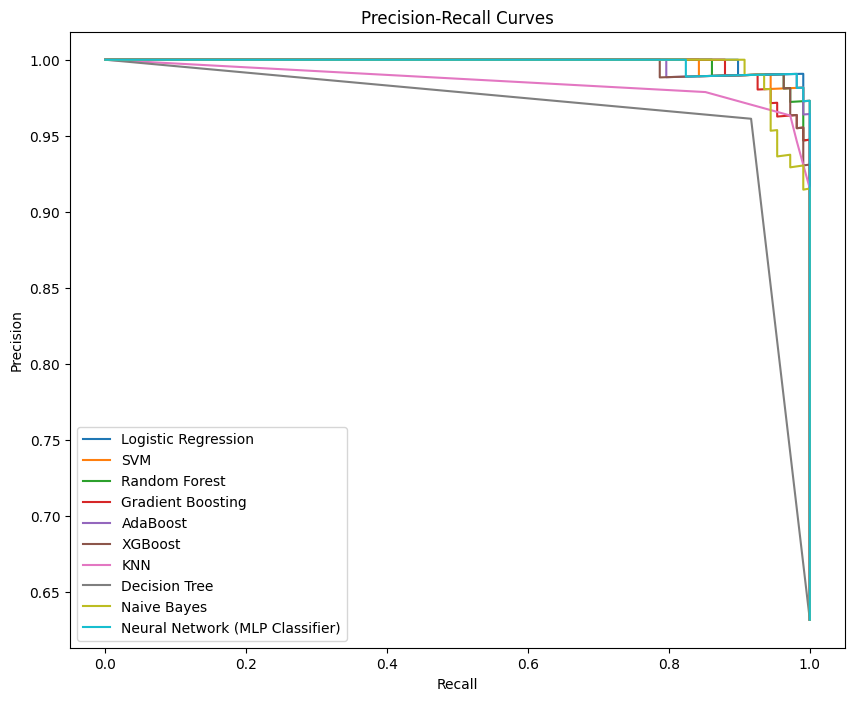

In [27]:
# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        plt.plot(recall, precision, label=f'{model_name}')

# Plotting Precision-Recall Curves for all applicable models

plt.figure(figsize=(10, 8))
plot_precision_recall_curve(lr_model, X_test, y_test, 'Logistic Regression')
plot_precision_recall_curve(svm_model, X_test, y_test, 'SVM')
plot_precision_recall_curve(rf_model, X_test, y_test, 'Random Forest')
plot_precision_recall_curve(gb_model, X_test, y_test, 'Gradient Boosting')
plot_precision_recall_curve(ab_model, X_test, y_test, 'AdaBoost')
plot_precision_recall_curve(xg_model, X_test, y_test, 'XGBoost')
plot_precision_recall_curve(knn_model, X_test, y_test, 'KNN')
plot_precision_recall_curve(dt_model, X_test, y_test, 'Decision Tree')
plot_precision_recall_curve(nb_model, X_test, y_test, 'Naive Bayes')
plot_precision_recall_curve(nn_model, X_test, y_test, 'Neural Network (MLP Classifier)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()

# NOTE:
roc are better for balanced dataset and prc are better for unbalanced dataset

both the curves being mirror reflection-ish of each other means the dataset is balanced and the model is pretty good.